In [1]:
# Definitions and functions
%matplotlib inline
import pdb
import sys
import pandas as pd
import numpy as np
import scipy.io as sio
import matplotlib.pyplot as plt
import matplotlib
import scipy.signal as sg
import math
import scipy as sp
import socket
import os
import wave
import struct
import h5py
from scipy.io import wavfile
from scipy.interpolate import interp1d
from scipy.signal import spectrogram
import logging
from IPython.display import display
matplotlib.style.use('ggplot')
from ipywidgets import *
import yaml
import numpy.lib.recfunctions as rfn 
import numpy.matlib as npm
import glob
from __future__ import division
# Check wich computer to decide where the things are mounted
comp_name=socket.gethostname()
print 'Computer: ' + comp_name

if 'txori' in comp_name or 'passaro' in comp_name or 'lintu' in comp_name:
    repos_folder = os.path.abspath('/mnt/cube/earneodo/repos')
    experiment_folder = os.path.join('/mnt/cube/earneodo/bci_zf/')
if 'lookfar' in comp_name:
    repos_folder = os.path.abspath('/Users/zeke/repos/')
    experiment_folder = os.path.abspath('/Users/zeke/experiments/bci_zf/')

sys.path.append(os.path.join(repos_folder, 'soundflow', 'sound_tools'))
sys.path.append(os.path.join(repos_folder, 'ephysflow'))
sys.path.append(os.path.join(repos_folder, 'analysis-tools'))

#setup the data folder
ss_data_folder = os.path.join(experiment_folder, 'ss_data')

# from file_tools import experiment as et
# from basic_viewing import events as evt
# from basic_viewing.units import Unit
# from basic_viewing.basic_plot import plot_raster, sparse_raster
# from basic_viewing import basic_plot as bp
# from basic_viewing import kwik_functions as kwf
# from basic_viewing import h5_functions as h5


Computer: passaro


In [47]:
bird = 'z028'
stim_sess = '001'
base_name = 'motiff_2b'

stim_folder = os.path.join(experiment_folder, 'stim_data', bird, stim_sess)
pitch_file = os.path.join(stim_folder, 'pitch_list - {0}.tsv'.format(bird))
bos_file = os.path.join(stim_folder, '{}.wav'.format(base_name))
auto_pitch_file = os.path.join(stim_folder, 'f0_smooth_{}.dat'.format(base_name))
env_file = os.path.join(stim_folder, 'env_{}.dat'.format(base_name))
#out_pitch_file = os.path.join(stim_folder, 'f0_extern_bos.dat')
out_pitch_file = os.path.abspath('/mnt/cube/earneodo/repos/synthesizer_working/f0_extern_{}.dat'.format(base_name))


auto_pitch_list = np.loadtxt(auto_pitch_file)
pitch_list = np.loadtxt(pitch_file)
env_list = np.loadtxt(env_file)
s_f, bos = wavfile.read(bos_file)

t= np.arange(0., np.max(pitch_list[:,0])*s_f+1)/s_f

t_out = np.arange(0., np.max(pitch_list[:,0])*s_f+1)/44100.

interp_pitch = np.interp(t, pitch_list[:,0], pitch_list[:,1])
pitch_f = interp1d(pitch_list[:,0], pitch_list[:,1], kind='cubic')
#interp_pitch = pitch_f(t)
out_pitch = np.array([np.arange(t.size), t, interp_pitch]).T
np.savetxt(out_pitch_file, out_pitch, fmt='%lg')

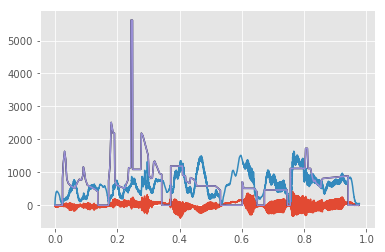

In [48]:
plt.plot(t, bos[:t.size]/10)
plt.plot(pitch_list[:,0], pitch_list[:,1], 'k')
plt.plot(env_list[:,0], env_list[:,2]*1000)
plt.plot(t, interp_pitch)

In [40]:
interp_pitch = np.interp(t, pitch_list[:,0], pitch_list[:,1])

In [41]:
t[-1:]

array([ 0.97569161])

In [42]:
1/np.diff(t)

array([ 44100.        ,  44100.        ,  44100.        , ...,
        44099.99999998,  44099.99999998,  44099.99999998])

In [43]:
np.arange(0., pitch_list[-1,0]*s_f)/s_f

array([  0.00000000e+00,   2.26757370e-05,   4.53514739e-05, ...,
         9.75623583e-01,   9.75646259e-01,   9.75668934e-01])

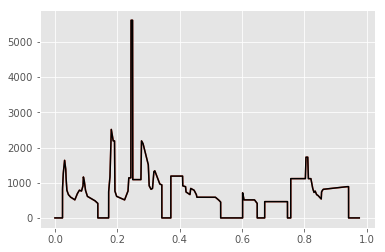

In [44]:
plt.plot(t, interp_pitch)
plt.plot(pitch_list[:,0], pitch_list[:,1], 'k')

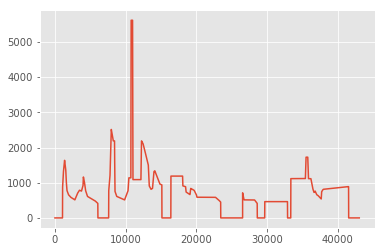

In [45]:
plt.plot(interp_pitch)

In [27]:
env_list[3000:4000,0]

array([ 0.0680272,  0.0680499,  0.0680726,  0.0680952,  0.0681179,
        0.0681406,  0.0681633,  0.0681859,  0.0682086,  0.0682313,
        0.068254 ,  0.0682766,  0.0682993,  0.068322 ,  0.0683447,
        0.0683673,  0.06839  ,  0.0684127,  0.0684354,  0.068458 ,
        0.0684807,  0.0685034,  0.0685261,  0.0685488,  0.0685714,
        0.0685941,  0.0686168,  0.0686395,  0.0686621,  0.0686848,
        0.0687075,  0.0687302,  0.0687528,  0.0687755,  0.0687982,
        0.0688209,  0.0688435,  0.0688662,  0.0688889,  0.0689116,
        0.0689342,  0.0689569,  0.0689796,  0.0690023,  0.0690249,
        0.0690476,  0.0690703,  0.069093 ,  0.0691156,  0.0691383,
        0.069161 ,  0.0691837,  0.0692063,  0.069229 ,  0.0692517,
        0.0692744,  0.0692971,  0.0693197,  0.0693424,  0.0693651,
        0.0693878,  0.0694104,  0.0694331,  0.0694558,  0.0694785,
        0.0695011,  0.0695238,  0.0695465,  0.0695692,  0.0695918,
        0.0696145,  0.0696372,  0.0696599,  0.0696825,  0.0697

In [13]:
out_pitch = np.array([np.arange(t.size), t, interp_pitch]).T